In [1]:
import numpy as np
from matplotlib import pyplot as plt
import import_ipynb
from truly_plastic_nn_w_moment import plastic_nn
from truly_plastic_nn_w_moment import input_layer
from truly_plastic_nn_w_moment import layer

importing Jupyter notebook from truly_plastic_nn_w_moment.ipynb


Text(0.5, 1.0, 'validation data')

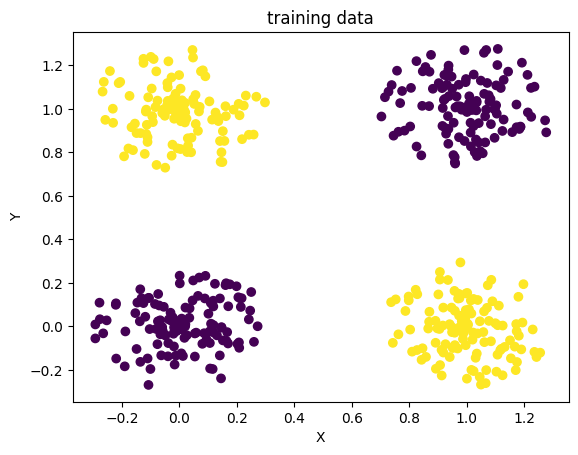

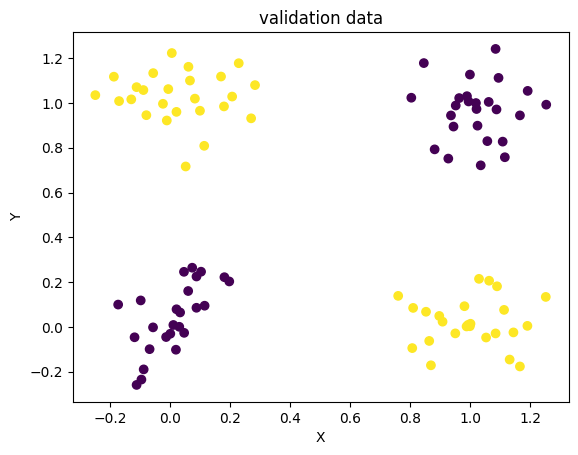

In [2]:
import math
train_size = 500
data_x_offset = 20
data_y_offset = 20
in_data = [] 
target_data = []
for i in range(train_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < train_size/4):
        in_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([0])
    elif (i < 2*train_size/4):
        in_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([0])
    elif(i < 3*train_size/4):
        in_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_data.append([1])
    else:
        in_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_data.append([1])

test_size = round(train_size*0.2)
in_test_data = [] 
target_test_data = []
for i in range(test_size):
    theta = np.random.random() * 2 * math.pi
    radius = np.random.rand() * 0.3
    if (i < test_size/4):
        in_test_data.append([0 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([0])
    elif (i < 2*test_size/4):
        in_test_data.append([1 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([0])
    elif(i < 3*test_size/4):
        in_test_data.append([ 1 + radius*math.cos(theta), 0 + radius*math.sin(theta) ])
        target_test_data.append([1])
    else:
        in_test_data.append([ 0 + radius*math.cos(theta), 1 + radius*math.sin(theta) ])
        target_test_data.append([1])

plt.figure()
plt.scatter(np.array(in_data)[:, 0], np.array(in_data)[:, 1], c = target_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("training data")

plt.figure()
plt.scatter(np.array(in_test_data)[:, 0], np.array(in_test_data)[:, 1], c = target_test_data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("validation data")

In [3]:

in_layer = input_layer(2)
tl = layer(lr = 0.01, prev_size = 2, my_size=2, activation_type="ReLU", optimizer = 'SGDwM', beta = 0.8)
out_layer = layer(lr = 0.01, prev_size = 2, my_size=1, activation_type="Sigmoid", optimizer = 'SGDwM', beta = 0.6)

test_nn = plastic_nn()
layers = [in_layer, tl, out_layer]

test_nn.append_layers(layers)

added LAYERS succesfully


True

In [4]:

to_display_bar = True

graph_err = []
graph_epoch=[]
epochs = 400
target_data = np.array(target_data)
#print(target_data)

bar_len = 50

def display_bar(bar_len, idx, total):
    idx = int(idx*bar_len/total)
    #print(perc)
    print("[", "-"*idx, "*", "-"*(bar_len-idx-1), "]", end='')
    print("\r",end='')

for i in range(epochs+1):
    if to_display_bar:
        display_bar(bar_len, i, epochs)
    
    #for idx in range(len(in_data)):
        #print("idx ", idx)
    test_nn.learn_one(in_data, target_data)



    error_sum = 0
    for idx in range(len(in_test_data)):
        valid_res = test_nn.forward(in_test_data[idx])
        #print(target_test_data[idx])
        #print(valid_res)
        error = (target_test_data[idx] - valid_res)**2
        error_sum+=error
    
    graph_err.append(error_sum/len(in_test_data))
    graph_epoch.append(i)



#print("graph_epoch ", graph_epoch)
#print("(graph_err)", graph_err)
plt.figure()
plt.scatter(graph_epoch, graph_err)
plt.xlabel('epoch')
plt.ylabel('error')

ValueError: cannot reshape array of size 1000 into shape (2,1)

In [ ]:
test_2_in = [[0, 0], [0,1], [1, 0], [1, 1],
            [0.2, 0.1], [-0.1, 1], [1.1, -0.1], [1.2, 1.1]]
for i in range(len(test_2_in)):
    print(test_nn.forward(test_2_in[i]))